## 0.Computer vision libraries in Pytorch

* torchvision - base domain library for Pytorch Computer Vision

* torchvision.datasets - get datasets and data loading functions for computer vision here

* torchvision.models - This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

* torchvision.transformrs -Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

* torch.utils.data.dataset - Base dataset class for PyTorch.

* torch.utils.data.DataLoader Creates a Python iterable over a dataset (created with torch.utils.data.Dataset.


In [ ]:
#Import pytorch
import torch
from torch import nn
#Import Torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
#Import matplotlib for visualization
import matplotlib.pyplot as plt

## 1.Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.dataset

In [ ]:
#setup training data
train_data= datasets.FashionMNIST(root="data",
                                  train=True, #alot of datasets from torchivision have test and train data , do we want the training data ? (T/F)
                                  download=True, #do we want to download it ?
                                  transform=torchvision.transforms.ToTensor(), #we are gonna download the images we need to transform them into tensors
                                  target_transform =None) #do we want to transform the target/label ?
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

100%|██████████| 26.4M/26.4M [00:00<00:00, 127MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 6.81MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 69.3MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classes_to_idx = train_data.class_to_idx
classes_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#check the shape of our image
print(f"Image shape : {image.shape,label} -> [color,height,width]")
print(f"Image label: {class_names[label]}")

Image shape : (torch.Size([1, 28, 28]), 9) -> [color,height,width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape:torch.Size([1, 28, 28])


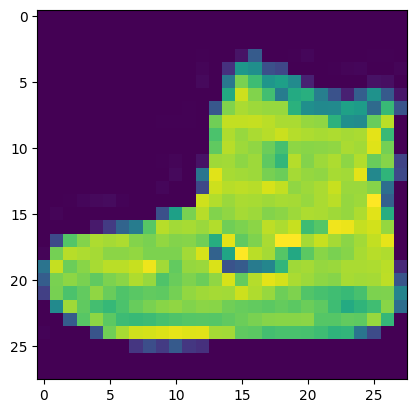

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

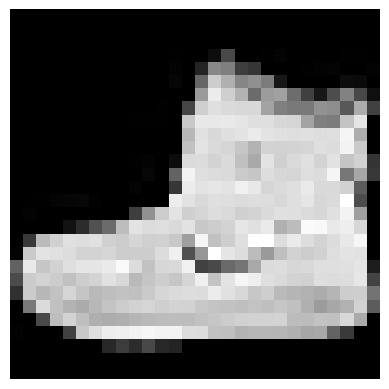

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.axis(False)

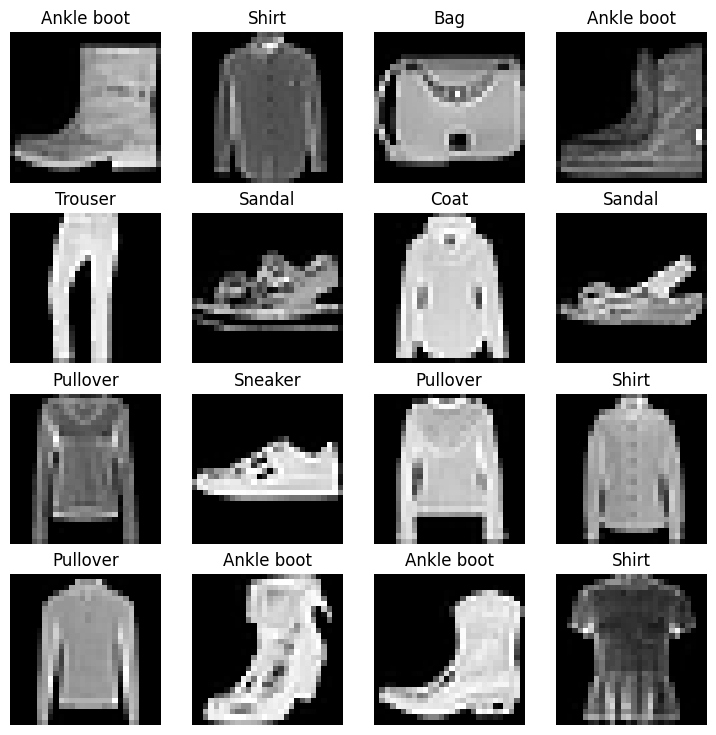

In [ ]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
for i in range(1,17):
  random_idx=torch.randint(0,len(train_data),size=[1]).item() #item trod el tensir normal python value [5] -> 5
  img,label=train_data[random_idx]
  fig.add_subplot(4,4,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2.Prepare DataLoader

Right now , our data is in the form of Pytorch Datasets

DataLoader turns our dataset into a python iterable

More specificaly ,we want to turn our data into batches

(Why would we do this ?)

For our computer bech ychouf el 6000 ligne (tetsama chwaya real examples fel Millions) fi mara barka lazmo memory behya(ram,gpu and computer ) , donc fama risk eno data kbira tnajemsh todkel lel ram so we break dataset of 6000 into batches .

1. More computionally effiecent khater not all comptuers can sotre at 6000 images in one hit , so we break it at 32 image at time (batch=32).

2. It gives our network more chances up upate it is gradient per epoch.if we will look at 6000 images at onc time we would only get 1 update par epoch across our dataset . Ama ken nchouf 32 image at time el nerual taaml update kol 32 image

In [ ]:
from torch.utils.data import DataLoader
#set up the batch hyperparameter
BATCH_SIZE=32
#turn data into iterables(batches)
train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False) # a better not shuffle for better evaluation
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab2715fb730>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab2715fba90>)

In [ ]:
#let's check what we created
print(f"dataloaders : {train_dataloader,test_dataloader}")
print(f"length:{len(train_dataloader)} batches of{BATCH_SIZE}")
print(f"dataloaders : {test_dataloader,test_dataloader}")
print(f"length:{len(test_dataloader)} batches of{BATCH_SIZE}")

dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7ab2715fb730>, <torch.utils.data.dataloader.DataLoader object at 0x7ab2715fba90>)
length:1875 batches of32
dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7ab2715fba90>, <torch.utils.data.dataloader.DataLoader object at 0x7ab2715fba90>)
length:313 batches of32


In [ ]:
#check our what in train dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape
#kol batch aandna tensor size fih 32 sample , color channel , height , width we aandna 32 label associate with it

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image sizetorch.Size([28, 28])


(-0.5, 27.5, 27.5, -0.5)

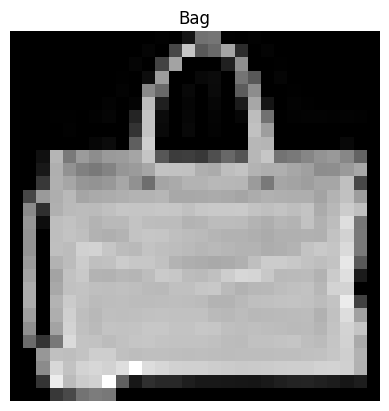

In [ ]:
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx].squeeze(),train_labels_batch[random_idx].squeeze()
plt.imshow(img,cmap="gray")
plt.title(class_names[label])
print(f"image size{img.shape}")
plt.axis(False)

## 3.Model 0 : Build a base lone model

A baseline model howa model tabda bih we t7asen fih bel model eli mbaad.



In [ ]:
#create a flatten layer
flatten_model = nn.Flatten()
#Get a signle sample
x=train_features_batch[0]
#flatten the sample
output = flatten_model(x)
print(f"shape before flatting it:{train_features_batch.shape}") #-> [color_channels,height,width]
print(f"shape after flatting:{output.shape}") #-> [color_channels,height*width]

shape before flatting it:torch.Size([32, 1, 28, 28])
shape after flatting:torch.Size([1, 784])


In [ ]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [ ]:
class ClothesClassification(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(nn.Flatten(), #anything that comes to this layer it is going to be flattened
                                    nn.Linear(in_features=input_shape,out_features=hidden_units),
                                    nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x) #we have non linearity for now


In [ ]:
torch.manual_seed(42)
model_0=ClothesClassification(input_shape=784,hidden_units=10,output_shape=len(class_names)).to("cpu") #input shape heya W*H 28*28
model_0

ClothesClassification(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
pred=model_0(dummy_x)
pred

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## 3.1 Set up loss function and optimizer


In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

## 3.2 Create a function to time our Experiment

Two fo the main things that you watn to track

1. Model's performance

2. How fast it runs

When we run exeperiments we want them fast af so we can experiment more times

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """print difference between start and end time """
  total_time = end - start
  print(f"Train on time{device}:{total_time:.3f} seconds")
  return total_time

## 3.3 Creating a training loop and training model on batches of data

1. Loop through epochs

2. Loop through training batches,perform training steps,calculate the train loss per batch

3. Loop through testing batches,perform testing steps,calculate the test loss per batch

4. Print what's happening

5. Time it all

In [ ]:
def model_train_fn(model: torch.nn.Module,
               train_dataloader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
                   device:torch.device):
  torch.manual_seed(42)
  epochs=3
  #put data into target device
  for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")
    #Training
    train_loss=0
    acc=0
    #add a loop to leep through the training batches
    for batch,(X,y) in enumerate(train_dataloader):
      """
      enumerate(train_dataloader) trajaa tuple batch index wel actual batch of data X,y
      """
      X,y=X.to(device),y.to(device)
      model.train()
      #1.forward pass
      pred_logits=model(X)
      #calcaulte the loss
      loss=loss_fn(pred_logits,y)
      acc=acc+accuracy_fn(y,pred_logits.argmax(dim=1))
      train_loss+=loss
      #grad zero
      optimizer.zero_grad()
      #loss backward
      loss.backward()
      #update the params
      optimizer.step()
      if batch%400==0:
        print(f"Look at {batch*len(X)}/{len(train_dataloader.dataset)}) samples ")
    train_loss=train_loss/len(train_dataloader)
    acc=acc/len(train_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} , train acc: {acc:.2f}%\n")

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device):
  """
  return a dictionary containing the result of model predicting on data_loader
  """
  torch.manual_seed(42)
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      #make predictions
      y_pred=model(X)
      loss=loss+loss_fn(y_pred,y)
      acc=acc+accuracy_fn(y,y_pred.argmax(dim=1))
    loss=loss/len(data_loader)
    acc=acc/len(data_loader)
    return ({'model name:':model.__class__.__name__,'loss':loss,'acc':acc})

## 4 Make predictions and get Model 0 results

In [ ]:
model_0=model_0.to("cpu")
start_timer=timer()
model_train_fn(model_0,train_dataloader,loss_fn,accuracy_fn,"cpu")
end_timer=timer()
model_0_time=print_train_time(start_timer,end_timer)

Epoch: 0
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.59039 , train acc: 79.17%

Epoch: 1
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.47445 , train acc: 83.33%

Epoch: 2
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.45325 , train acc: 84.09%

Train on timeNone:37.288 seconds


In [ ]:
model_0_results=eval_model(model_0,test_dataloader,loss_fn,accuracy_fn,"cpu")

## 5. Setup device agnostic-code(for using a gpu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model1: Building a better model with non-linearity

In [ ]:
class NonLinearModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_1=NonLinearModel(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device) #input shape heya W*H 28*28
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)
start_timer=timer()
model_train_fn(model_1,train_dataloader,loss_fn,accuracy_fn,device)
end_timer=timer()
model_1_time=print_train_time(start_timer,end_timer)

Epoch: 0
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 1.09199 , train acc: 61.34%

Epoch: 1
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.76867 , train acc: 72.45%

Epoch: 2
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.66650 , train acc: 76.09%

Train on timeNone:30.385 seconds


In [ ]:
model_1_results=eval_model(model_1,test_dataloader,loss_fn,accuracy_fn,device)

## Model 2: Build a Convolutional Neural Network (CNN)

CNN's are known for their capabilities to fidn pattern in visual Data

In [ ]:
class FashionMNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModel(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)

In [ ]:
#pass image throw model
image=image.to(device)
model_2(image.unsqueeze(0))


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)
start_timer=timer()
model_train_fn(model_2,train_dataloader,loss_fn,accuracy_fn,device)
end_timer=timer()
model_2_time=print_train_time(start_timer,end_timer)

Epoch: 0
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.59370 , train acc: 78.47%

Epoch: 1
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.35945 , train acc: 86.98%

Epoch: 2
-------
Look at 0/60000) samples 
Look at 12800/60000) samples 
Look at 25600/60000) samples 
Look at 38400/60000) samples 
Look at 51200/60000) samples 

Train loss: 0.32137 , train acc: 88.32%

Train on timeNone:35.178 seconds


In [ ]:
model_2_results=eval_model(model_2,test_dataloader,loss_fn,accuracy_fn,device)

## 7.Compare results

In [ ]:
import pandas as pd
df=pd.DataFrame([model_0_results,model_1_results,model_2_results])
df

,model name:,loss,acc
0,ClothesClassification,tensor(0.5109),82.378195
1,NonLinearModel,"tensor(0.6889, device='cuda:0')",74.980032
2,FashionMNISTModel,"tensor(0.3630, device='cuda:0')",87.170527


In [ ]:
df['training_time']=[model_0_time,model_1_time,model_2_time]
df

,model name:,loss,acc,training_time
0,ClothesClassification,tensor(0.5109),82.378195,37.288388
1,NonLinearModel,"tensor(0.6889, device='cuda:0')",74.980032,30.384886
2,FashionMNISTModel,"tensor(0.3630, device='cuda:0')",87.170527,35.178381
